<!-- docusaurus_head_meta::start
---
title: Introduction Notebook
---
docusaurus_head_meta::end -->

<div style="text-align: center;">
    <img src="http://wandb.me/logo-im-png" width="600" alt="Weights & Biases" />
</div>
<!--- @wandbcode{intro-colab} -->

<font color="pink">Senior Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Links de estudo:

* [How to build a RAG system](https://wandb.ai/rag-course/rag-course/reports/How-to-build-a-RAG-system--Vmlldzo5NjY0NDUw?utm_source=send&utm_medium=email&utm_campaign=weave_newsletter&mkt_tok=MjYxLVFIUC04MjIAAAGWVTi_998lkq2wQodXoRh1KnlKFwSzwxxAnnU2J_xJ9ZygP0hw4fSXQCaFcNsZO28Hs4PI6-D_Y2r769D5BGLSyuhO9IUl_3HLDcFCiUSR)

* [Building reliable apps with GPT-4o and structured outputs](https://wandb.ai/byyoung3/ML_NEWS3/reports/Building-reliable-apps-with-GPT-4o-and-structured-outputs--Vmlldzo5NjM3MDU5?utm_source=send&utm_medium=email&utm_campaign=weave_newsletter&mkt_tok=MjYxLVFIUC04MjIAAAGWVTi_9ukc1NwoPluktU9oVF5Gheg-LxEy_B2xoCs4t_i8_wZVyi4J7kaogJxOF8BM9X2-cn1sxz5WnzLqtNXO-Vv5dgYzps2hmSj6NFOL)

# <font color="red">The basic RAG process</font>

![](https://api.wandb.ai/files/rag-course/images/projects/40060395/81b9d979.png)

In [1]:
import openai
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
#openai.api_key  = os.environ['OPENAI_API_KEY']
#Eddy_key_openai  = os.environ['OPENAI_API_KEY']

#from openai import OpenAI
#client = OpenAI(api_key=Eddy_key_openai)


import getpass
import os

import wandb

Eddy_key_cohere = os.environ['COHERE_API_KEY']
#os.environ["COHERE_API_KEY"] = getpass.getpass("Please enter your COHERE_API_KEY")

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: eddygiusepe. Use `wandb login --relogin` to force relogin


True

In [2]:

!git clone https://github.com/wandb/edu.git
%cd edu/rag-advanced
%pip install -qqq -r requirements.txt

%cd notebooks

import nltk

nltk.download("wordnet")

fatal: destination path 'edu' already exists and is not an empty directory.


/home/eddygiusepe/2_EddyGiusepe_Estudo/Exploring_the_World_of_Programming_with_Python/venv_All/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/eddygiusepe/2_EddyGiusepe_Estudo/Exploring_the_World_of_Programming_with_Python/34_Weave_Weights_&_Biases/edu/rag-advanced
Note: you may need to restart the kernel to use updated packages.
/home/eddygiusepe/2_EddyGiusepe_Estudo/Exploring_the_World_of_Programming_with_Python/34_Weave_Weights_&_Biases/edu/rag-advanced/notebooks


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/eddygiusepe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pathlib
from typing import List

import weave

from scripts.utils import display_source

Here, we will start a Weights & Biases run. We will be using this to download a [W&B Artifact](https://docs.wandb.ai/guides/artifacts/) called wandb_docs. This is the raw Weights & Biases documentation. W&B Artifacts is suited for versiong different data sources which needs preprocessing/cleaning.

In [7]:
WANDB_PROJECT = "rag-course"

run = wandb.init(
    project=WANDB_PROJECT,
    group="Chapter 1",
)

# <font color="red">Data ingestion</font>

In [8]:
documents_artifact = run.use_artifact(
    f"rag-course/dev/wandb_docs:latest", type="dataset"
)
data_dir = "../data/wandb_docs"

docs_dir = documents_artifact.download(data_dir)


wandb:   406 of 406 files downloaded.  


In [9]:
docs_dir = pathlib.Path(docs_dir)
docs_files = sorted(docs_dir.rglob("*.md"))

print(f"Number of files: {len(docs_files)}\n")
print("First 5 files:\n{files}".format(files="\n".join(map(str, docs_files[:5]))))

Number of files: 406

First 5 files:
../data/wandb_docs/guides/app/features/anon.md
../data/wandb_docs/guides/app/features/custom-charts/intro.md
../data/wandb_docs/guides/app/features/custom-charts/walkthrough.md
../data/wandb_docs/guides/app/features/intro.md
../data/wandb_docs/guides/app/features/notes.md


In [10]:
print(docs_files[0].read_text())

---
description: Log and visualize data without a W&B account
displayed_sidebar: default
---

# Anonymous Mode

Are you publishing code that you want anyone to be able to run easily? Use Anonymous Mode to let someone run your code, see a W&B dashboard, and visualize results without needing to create a W&B account first.

Allow results to be logged in Anonymous Mode with `wandb.init(`**`anonymous="allow"`**`)`

:::info
**Publishing a paper?** Please [cite W&B](https://docs.wandb.ai/company/academics#bibtex-citation), and if you have questions about how to make your code accessible while using W&B, reach out to us at support@wandb.com.
:::

### How does someone without an account see results?

If someone runs your script and you have to set `anonymous="allow"`:

1. **Auto-create temporary account:** W&B checks for an account that's already signed in. If there's no account, we automatically create a new anonymous account and save that API key for the session.
2. **Log results quickly:** T

In [11]:
# We'll store the files as dictionaries with some content and metadata
data = []
for file in docs_files:
    content = file.read_text()
    data.append(
        {
            "content": content,
            "metadata": {
                "source": str(file.relative_to(docs_dir)),
                "raw_tokens": len(content.split()),
            },
        }
    )
data[:2]

[{'content': '---\ndescription: Log and visualize data without a W&B account\ndisplayed_sidebar: default\n---\n\n# Anonymous Mode\n\nAre you publishing code that you want anyone to be able to run easily? Use Anonymous Mode to let someone run your code, see a W&B dashboard, and visualize results without needing to create a W&B account first.\n\nAllow results to be logged in Anonymous Mode with `wandb.init(`**`anonymous="allow"`**`)`\n\n:::info\n**Publishing a paper?** Please [cite W&B](https://docs.wandb.ai/company/academics#bibtex-citation), and if you have questions about how to make your code accessible while using W&B, reach out to us at support@wandb.com.\n:::\n\n### How does someone without an account see results?\n\nIf someone runs your script and you have to set `anonymous="allow"`:\n\n1. **Auto-create temporary account:** W&B checks for an account that\'s already signed in. If there\'s no account, we automatically create a new anonymous account and save that API key for the ses

In [12]:
WANDB_PROJECT = "rag-course"

weave_client = weave.init(WANDB_PROJECT)

weave version 0.51.14 has been recalled!  (Evaluation framework is mis-reporting the inputs for prediction records)  Please upgrade.
Logged in as Weights & Biases user: eddygiusepe.
View Weave data at https://wandb.ai/eddygiusepe/rag-course/weave


In [13]:
# build weave dataset
raw_data = weave.Dataset(name="raw_data", rows=data)

# publish the dataset
weave.publish(raw_data)

📦 Published to https://wandb.ai/eddygiusepe/rag-course/weave/objects/raw_data/versions/z2bmXeQ8wCaPFYHHrbV0tTy7g1Pi8tWwDHa4plAjF1E


ObjectRef(entity='eddygiusepe', project='rag-course', name='raw_data', _digest='z2bmXeQ8wCaPFYHHrbV0tTy7g1Pi8tWwDHa4plAjF1E', _extra=())

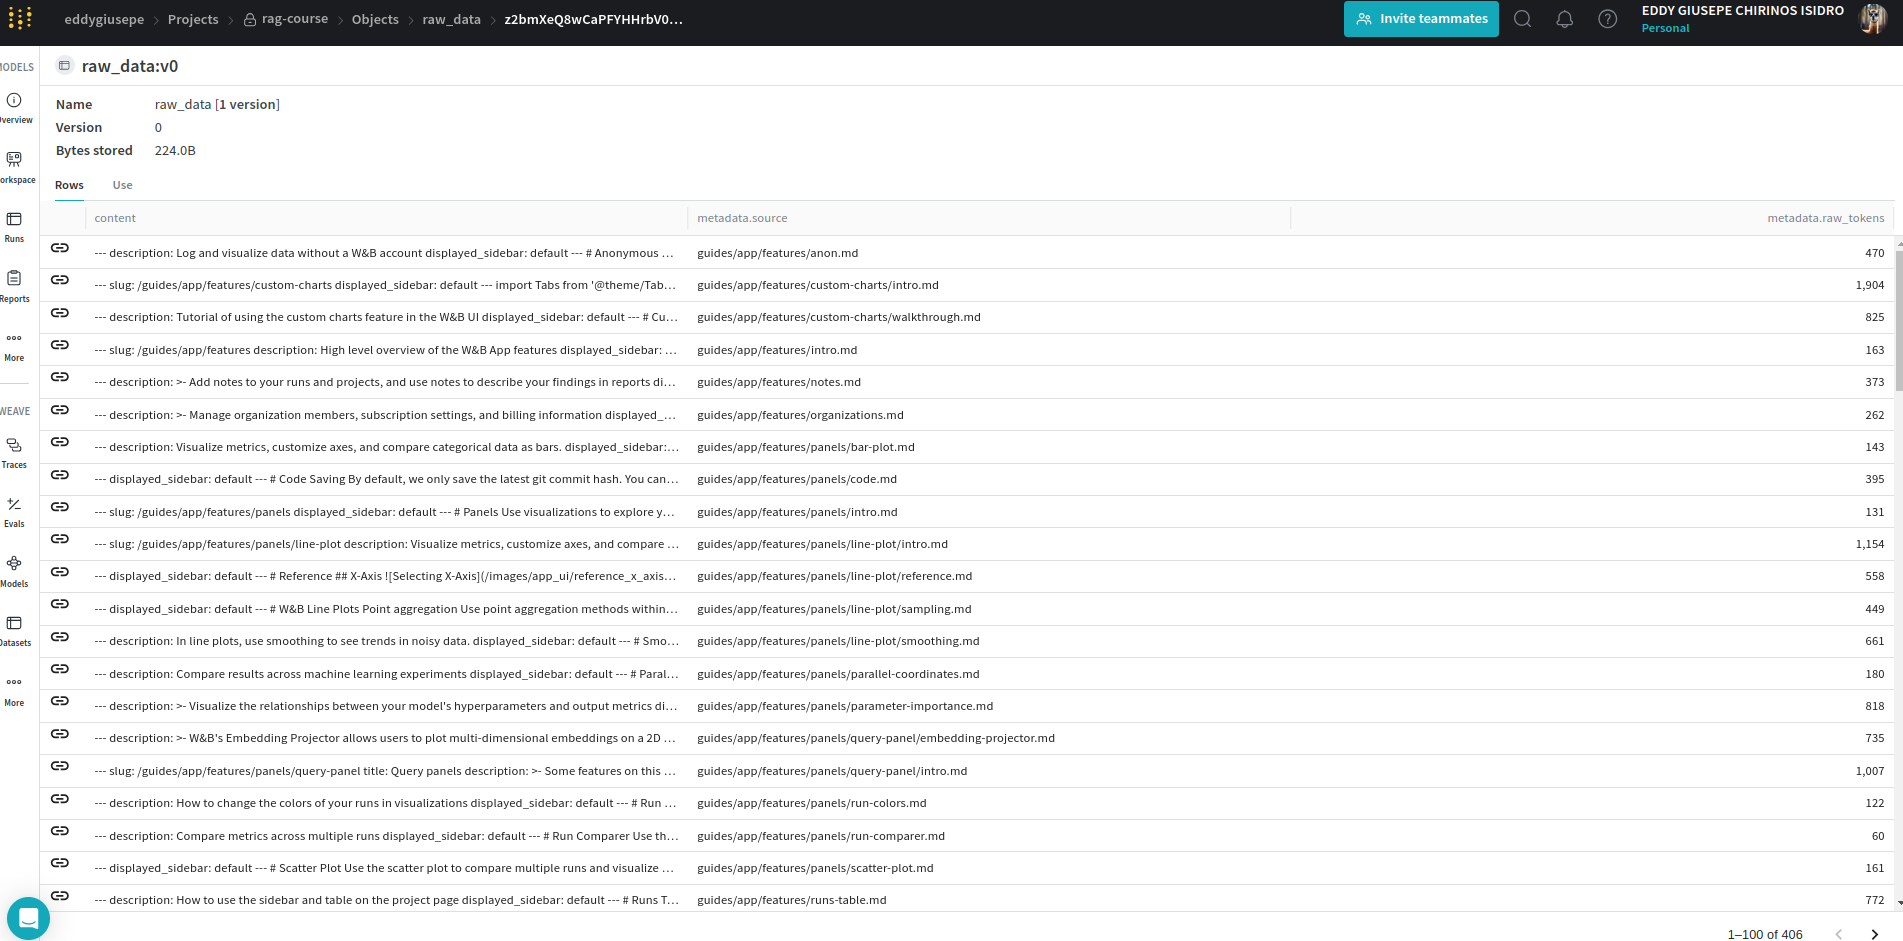